### Babaahmadi-narges-610398102-HW2

##### Importing needed libraries

In [1]:
import numpy as np
import pandas as pd
import more_itertools as mit
import numpy as np
import matplotlib.pyplot as plt

#### Two queens conflict with each other if | i - j | == | X[i] - X[j] |
Based on that, i define my fitness function

In [11]:
def fitness_func(chromosome):
    global n
    fitness = 0
    for i in range(n):

        for j in range(i+1,n):

            if ( abs(chromosome[i]-chromosome[j] ) == abs(i-j)):
                fitness+=1
    return fitness

#### Initializing the socity
My chromosomes are permutations of n digits.\
the indexes of the array are row numbers and the value in each index is the column number for each queen.

In [3]:
def make_society(population):
    global n
    society = []
    for i in range(population):
        society.append(mit.random_permutation(range(n)))
        
    fitness = []
    for chromosome in society:
        fitness.append(fitness_func(chromosome))
        
    df = pd.DataFrame({'society':society,'fitnesses':fitness})
#     print(df)
    return society, df

I used truncation method to choose parents.(just as I did in genetic algorithm exercise)

In [4]:
#choosing parents
def truncation(T,N):
    global df
    df2 = df.sort_values(by=['fitnesses'])
    T_num = int((T/100)*(len(df2)))
    df2 = df2.head(T_num)
    df2 = df2.sample(N)

    return df2

Both crossover and mutation functions are also the same as previous exercise.

In [5]:
#crossover
def order_recombination(chromosome1, chromosome2):
    global n
    point1 = np.random.randint(0,n-1)
    point2 = np.random.randint(point1,n-1)
    child = []
    for i in range(n):
        child.append(-1)
        
    for i in range(point1, point2+1):
        child[i] = chromosome1[i]
        
    counter = point2+1
    for i in range(point2+1, n):
        if (chromosome2[i] not in child):
            child[counter] = chromosome2[i]
            counter+=1
            
    for i in range(point2+1):
        if(chromosome2[i] not in child):
            if counter < n :
                child[counter] = chromosome2[i]
                counter+=1
            else:
                counter = 0
                child[counter] = chromosome2[i]
                counter+=1

    return child

In [6]:
#implementing mutation
#mirroring between indexes point1 and point2
def mutation(chromosome):
    global n
    point1 = np.random.randint(0,n-2)
    point2 = np.random.randint(point1+1,n-1)

    help1 = point2 - point1
    
    if ( help1 % 2 == 0 ):
        point2 +=1
        
    for i in range(point1, point2):
        help_int = chromosome[i]
        chromosome[i] = chromosome[point2]
        chromosome[point2] = help_int
        point2 -= 1 

    return chromosome

#### Neighbourhood function
As I used an MA to solve the problem, I would have to define a neighbourhood function, which generated the neighbours of input chromosome.\
The neighbourhood function below, generates a random number(call it m) and swaps m indexes starting from some random number(start_change) with m other indexes.

In [7]:
def neighbourhood(chromosome):
    global n
    change_len = np.random.randint(1, int(n/2))
    start_change = np.random.randint(0, n-(2*change_len))
#     print("change_len :", end=" ")
#     print(change_len)

#     print("start_change :", end=" ")
#     print(start_change)
    for i in range(start_change, start_change+change_len):
        help1 = chromosome[i] 
        chromosome[i] = chromosome[i+change_len]
        chromosome[i+change_len] = help1
#     print(chromosome)
    return chromosome

#### local search 
Here i generate neighbour_num neighbours for chromosome1 using neighbourhood function, and return the neighbour with the best fitness.

In [8]:
def local_search(chromosome1, neighbour_num):
    neighbours_arr = []
    fitnesses = []
    neighbour = []
    j = neighbour_num
    while (j > 0):
        
        neighbour = neighbourhood(chromosome1)

        if(neighbour not in neighbours_arr):
            j-=1
            neighbours_arr.append( neighbour[:] )
            fitnesses.append( fitness_func(neighbour) )
        
    best_fitness = fitnesses[0]
    fitness_id = 0
#     print(neighbors_arr)
#     print(fitnesses)
    for i in range(neighbour_num):
        if fitnesses[i] < best_fitness:
            fitness_id = i
            best_fitness = fitnesses[i]
#     print("best_fitness :", end=" ")
#     print(best_fitness)
#     print("best_neighbor : ", end=" ")
#     print(neighbors_arr[fitness_id])
    return neighbours_arr[fitness_id]

In [42]:
def plot(chromosome):
    global n
    arr_one = []
    arr_two = []
    mat = []
    for i in range(n):
        if (i==0):
            arr_one.append(2)
            arr_two.append(0)
        elif(i%2==1):
            arr_one.append(0)
            arr_two.append(2)
        else:
            arr_one.append(2)
            arr_two.append(0)  
    for i in range(n):
        if(i==0):
            mat.append(arr_one[:])
        elif(i%2==1):
            mat.append(arr_two[:])
        else:
            mat.append(arr_one[:])

    for i in range(len(chromosome)):
        mat[chromosome[i]][i] = 1
        
    plt.figure(figsize=(n,n))
    plt.imshow(mat, cmap='gray')

#### main function
this function is the same as my GA homework main function, but here i change a percentage of children with their fittest neighbour. 

In [33]:
# we have an n*n chess board

# population = The number of my initial population

# T = The percentage of population that i choose randomly from ,as parents

# parents_percent = The percentage of population that i choose as parents

# children_percentage = children precentage(from parents)

# m = mutation percent

# LS = local search percentage(from children num)

# neighbour_per = percentage neighbours for each point(from children num)
global n

def main_func(x, population, T, parents_percent, children_percentage, m, LS, neighbor_per):
    global n
    global df

    n = x
    #initializing population
    make_society(population)

    N = int((parents_percent/100)*population) #N is the number of parents i choose

    children_num = int((children_percentage/100)*N) #children_num is the number of children i have

    society,df = make_society(population)
    # print(society[4])

    m = int( (m/100) * children_num ) # m is the number of children that get mutated
    LS = int( (LS/100) * children_num )# LS is the number of children that we do local search for
    neighbour_num = int( (neighbour_per/100) * children_num )

    print("df :", end=" ")
    print(df) 

    df_h = df

    while(df_h['fitnesses'].values[0] != 0):
        society = truncation(T, N)['society'].to_list()
        children =[]

        #making the children
        for i in range(children_num):
            res = []
            for j in range(2):
                res.append(np.random.randint(0,N))

            child = order_recombination(society[res[0]], society[res[1]])
            children.append(child)

        #children mutation
        for i in range(m):
            children[i] = mutation(children[i])

        for j in range(LS):
            children[children_num-j-1] = local_search(children[children_num-j-1], neighbour_num)

        #finding the fittness of the children
        fitness = []
        for child in children:
            fitness.append(fitness_func(child))

        #making a data frame for children
        df_children  = pd.DataFrame({'society':children,'fitnesses':fitness})

        df = df.sort_values(by=['fitnesses'])   
        df = df.head(population - children_num)

        #adding children to our society
        frames = [df, df_children]
        df = pd.concat(frames)
        df_h = df.sort_values(by=['fitnesses'])
        
        me= df_h['fitnesses'].mean()
        mi = df_h['fitnesses'].min()
        mean.append(me)
        min1.append(mi)


        print(df_h)
    
    df_h.head()
    print(df_h['society'].values[0])
    data = pd.DataFrame({'mean':mean, 'min':min1})
    data.plot()

### N= 100

In [ ]:
main_func(100, 150,60, 50, 150, 50,20, 40)

As you can see it took a lot of iterations but i didn't get any answer, so i changed the parameters to do ,both, local search and mutation on a bigger part of the children so that i won't get stuck in local optima.

In [ ]:
main_func(100, 150,60, 50, 150, 60,30, 40)

###### The answer for N=100 is :
[26, 42, 69, 76, 35, 37, 3, 8, 93, 12, 66, 46, 56, 43, 36, 89, 67, 71, 4, 68, 65, 38, 86, 84, 22, 0, 49, 27, 16, 91, 87, 2, 34, 92, 19, 81, 60, 57, 29, 51, 24, 54, 90, 83, 18, 98, 82, 53, 73, 11, 1, 94, 79, 40, 58, 14, 33, 95, 28, 55, 74, 77, 61, 7, 13, 15, 32, 48, 31, 5, 99, 78, 41, 30, 17, 6, 97, 25, 88, 62, 44, 96, 75, 59, 45, 80, 64, 52, 23, 47, 20, 70, 72, 85, 39, 63, 50, 9, 21, 10]

### N = 200

I know that duo to clean code rules, I mustn't repeat myself but i did here :))\
I could've changed it but it takes too long for N=200 and i don't have time to rerun it :)

In [ ]:
n = 200
#The number of my initial population
population = 150

#initializing population
make_society(population)

#The percentage of population that i choose randomly from ,as parents
T = 60

#The percentage of population that i choose as parents
parents_percent = 50
N = int((parents_percent/100)*population)

#children precentage(from parents)
children_percentage = 150
children_num = int((children_percentage/100)*N)

#mutation percentage
m = 50

#local search percentage(from children num)
LS = 20

#percentage neighbours for each point(from children num)
neighbour_per = 40

society,df = make_society(population)
# print(society[4])

m = int( (m/100) * children_num ) # m is the number of children that get mutated
LS = int( (LS/100) * children_num )# LS is the number of children that we do local search for
neighbour_num = int( (neighbour_per/100) * children_num )

print("df :", end=" ")
print(df) 

df2 = df

while(df2['fitnesses'].values[0] != 0):
    society = truncation(T, N)['society'].to_list()
    children =[]

    #making the children
    for i in range(children_num):
        res = []
        for j in range(2):
            res.append(np.random.randint(0,N))
            
        child = order_recombination(society[res[0]], society[res[1]])
        children.append(child)
     
    #children mutation
    for i in range(m):
        children[i] = mutation(children[i])
    
    for j in range(LS):
#         print("changed")
        children[children_num-j-1] = local_search(children[children_num-j-1], neighbour_num)
        
    #finding the fittness of the children
    fitness = []
    for child in children:
        fitness.append(fitness_func(child))

    #making a data frame for children
    df_children  = pd.DataFrame({'society':children,'fitnesses':fitness})
    
    df = df.sort_values(by=['fitnesses'])   
    df = df.head(population - children_num)
    
    #adding children to our society
    frames = [df, df_children]
    df = pd.concat(frames)
    df2 = df.sort_values(by=['fitnesses'])

    print(df2)
#     print(df['society'].where(df['fitnesses'] == 0))

In [14]:
df2.head()

,society,fitnesses
54,"[171, 188, 88, 196, 56, 65, 191, 143, 69, 152,...",0
22,"[171, 188, 88, 196, 56, 65, 191, 143, 69, 152,...",1
81,"[171, 188, 88, 196, 56, 65, 191, 143, 69, 152,...",1
82,"[171, 188, 88, 196, 56, 65, 191, 143, 69, 152,...",1
88,"[171, 188, 88, 196, 56, 65, 191, 143, 69, 152,...",1


In [19]:
society_column = df2.loc[:,'society']
print("answer fo n= 200 : ", end =" ")
print(society_column[54])
print("fitness = ", end = " ")
print(fitness_func(society_column[54]))

answer fo n= 200 :  [171, 188, 88, 196, 56, 65, 191, 143, 69, 152, 51, 17, 61, 135, 118, 107, 93, 67, 37, 85, 77, 54, 91, 102, 70, 115, 89, 169, 159, 147, 78, 33, 3, 38, 23, 79, 40, 1, 47, 124, 148, 140, 161, 181, 12, 146, 121, 119, 11, 96, 163, 177, 141, 27, 99, 185, 154, 194, 68, 43, 170, 131, 84, 166, 94, 97, 20, 34, 189, 31, 9, 136, 199, 74, 168, 90, 157, 22, 73, 184, 63, 137, 108, 103, 172, 127, 198, 114, 48, 30, 192, 155, 42, 193, 41, 29, 120, 15, 59, 182, 180, 26, 125, 35, 175, 104, 76, 53, 25, 105, 165, 150, 126, 142, 28, 151, 110, 39, 130, 45, 179, 197, 195, 0, 82, 14, 134, 162, 87, 2, 167, 52, 153, 44, 46, 100, 122, 190, 16, 111, 132, 81, 145, 116, 92, 138, 6, 160, 83, 36, 5, 49, 21, 72, 123, 98, 113, 173, 183, 60, 24, 8, 58, 7, 57, 10, 86, 164, 75, 144, 106, 178, 62, 128, 71, 66, 18, 129, 156, 32, 64, 109, 158, 19, 55, 80, 186, 50, 176, 187, 139, 133, 174, 117, 4, 13, 95, 101, 149, 112]
fitness =  0


#### Answer fo n= 200 :
[171, 188, 88, 196, 56, 65, 191, 143, 69, 152, 51, 17, 61, 135, 118, 107, 93, 67, 37, 85, 77, 54, 91, 102, 70, 115, 89, 169, 159, 147, 78, 33, 3, 38, 23, 79, 40, 1, 47, 124, 148, 140, 161, 181, 12, 146, 121, 119, 11, 96, 163, 177, 141, 27, 99, 185, 154, 194, 68, 43, 170, 131, 84, 166, 94, 97, 20, 34, 189, 31, 9, 136, 199, 74, 168, 90, 157, 22, 73, 184, 63, 137, 108, 103, 172, 127, 198, 114, 48, 30, 192, 155, 42, 193, 41, 29, 120, 15, 59, 182, 180, 26, 125, 35, 175, 104, 76, 53, 25, 105, 165, 150, 126, 142, 28, 151, 110, 39, 130, 45, 179, 197, 195, 0, 82, 14, 134, 162, 87, 2, 167, 52, 153, 44, 46, 100, 122, 190, 16, 111, 132, 81, 145, 116, 92, 138, 6, 160, 83, 36, 5, 49, 21, 72, 123, 98, 113, 173, 183, 60, 24, 8, 58, 7, 57, 10, 86, 164, 75, 144, 106, 178, 62, 128, 71, 66, 18, 129, 156, 32, 64, 109, 158, 19, 55, 80, 186, 50, 176, 187, 139, 133, 174, 117, 4, 13, 95, 101, 149, 112]

### N = 300

Again I repeated myself here but that won't happen anymore:)

In [ ]:
n = 300
#The number of my initial population
population = 100

#initializing population
make_society(population)

#The percentage of population that i choose randomly from ,as parents
T = 60

#The percentage of population that i choose as parents
parents_percent = 50
N = int((parents_percent/100)*population)

#children precentage(from parents)
children_percentage = 150
children_num = int((children_percentage/100)*N)

#mutation percentage
m = 50

#local search percentage(from children num)
LS = 20

#percentage neighbours for each point(from children num)
neighbour_per = 40

society,df = make_society(population)
# print(society[4])

m = int( (m/100) * children_num ) # m is the number of children that get mutated
LS = int( (LS/100) * children_num )# LS is the number of children that we do local search for
neighbour_num = int( (neighbour_per/100) * children_num )

print("df :", end=" ")
print(df) 

df2 = df

while(df2['fitnesses'].values[0] != 0):
    society = truncation(T, N)['society'].to_list()
    children =[]

    #making the children
    for i in range(children_num):
        res = []
        for j in range(2):
            res.append(np.random.randint(0,N))
            
        child = order_recombination(society[res[0]], society[res[1]])
        children.append(child)
     
    #children mutation
    for i in range(m):
        children[i] = mutation(children[i])
    
    for j in range(LS):
#         print("changed")
        children[children_num-j-1] = local_search(children[children_num-j-1], neighbour_num)
        
    #finding the fittness of the children
    fitness = []
    for child in children:
        fitness.append(fitness_func(child))

    #making a data frame for children
    df_children  = pd.DataFrame({'society':children,'fitnesses':fitness})
    
    df = df.sort_values(by=['fitnesses'])   
    df = df.head(population - children_num)
    
    #adding children to our society
    frames = [df, df_children]
    df = pd.concat(frames)
    df2 = df.sort_values(by=['fitnesses'])

    print(df2)
#     print(df['society'].where(df['fitnesses'] == 0))

In [24]:
df2.head()

,society,fitnesses
20,"[292, 75, 274, 93, 31, 189, 64, 283, 9, 280, 2...",0
5,"[292, 75, 274, 93, 31, 189, 64, 283, 9, 280, 2...",1
59,"[292, 75, 274, 93, 31, 189, 64, 283, 9, 280, 2...",1
56,"[292, 75, 274, 93, 31, 189, 64, 283, 9, 280, 2...",1
59,"[292, 75, 274, 93, 31, 189, 64, 283, 9, 280, 2...",1


In [25]:
society_column = df2.loc[:,'society']
print("answer fo n= 300 : ", end =" ")
print(society_column[20])
print("fitness = ", end = " ")
print(fitness_func(society_column[20]))

answer fo n= 300 :  [292, 75, 274, 93, 31, 189, 64, 283, 9, 280, 233, 262, 11, 95, 115, 19, 118, 207, 112, 108, 154, 81, 271, 181, 5, 235, 197, 206, 91, 76, 125, 141, 238, 158, 179, 268, 270, 35, 192, 77, 86, 293, 142, 52, 188, 3, 282, 164, 89, 275, 126, 199, 239, 234, 131, 255, 212, 178, 287, 139, 240, 278, 204, 147, 60, 78, 90, 174, 73, 281, 120, 217, 232, 124, 190, 203, 69, 83, 68, 6, 137, 276, 32, 17, 84, 257, 223, 151, 16, 10, 155, 264, 28, 294, 41, 191, 15, 172, 266, 143, 162, 265, 123, 222, 176, 96, 237, 231, 49, 13, 55, 59, 66, 23, 168, 103, 79, 109, 14, 87, 107, 272, 130, 106, 216, 251, 128, 25, 246, 295, 200, 100, 18, 40, 186, 244, 289, 110, 54, 82, 245, 7, 171, 122, 70, 214, 269, 39, 170, 252, 169, 284, 219, 241, 209, 44, 53, 248, 195, 230, 111, 1, 27, 98, 38, 297, 160, 138, 20, 36, 202, 286, 299, 2, 85, 37, 135, 250, 259, 277, 119, 65, 218, 163, 296, 205, 88, 33, 134, 165, 47, 221, 24, 62, 210, 8, 127, 290, 116, 247, 182, 71, 167, 242, 63, 183, 285, 21, 43, 92, 228, 236, 11

#### Answer fo n= 300 :
[292, 75, 274, 93, 31, 189, 64, 283, 9, 280, 233, 262, 11, 95, 115, 19, 118, 207, 112, 108, 154, 81, 271, 181, 5, 235, 197, 206, 91, 76, 125, 141, 238, 158, 179, 268, 270, 35, 192, 77, 86, 293, 142, 52, 188, 3, 282, 164, 89, 275, 126, 199, 239, 234, 131, 255, 212, 178, 287, 139, 240, 278, 204, 147, 60, 78, 90, 174, 73, 281, 120, 217, 232, 124, 190, 203, 69, 83, 68, 6, 137, 276, 32, 17, 84, 257, 223, 151, 16, 10, 155, 264, 28, 294, 41, 191, 15, 172, 266, 143, 162, 265, 123, 222, 176, 96, 237, 231, 49, 13, 55, 59, 66, 23, 168, 103, 79, 109, 14, 87, 107, 272, 130, 106, 216, 251, 128, 25, 246, 295, 200, 100, 18, 40, 186, 244, 289, 110, 54, 82, 245, 7, 171, 122, 70, 214, 269, 39, 170, 252, 169, 284, 219, 241, 209, 44, 53, 248, 195, 230, 111, 1, 27, 98, 38, 297, 160, 138, 20, 36, 202, 286, 299, 2, 85, 37, 135, 250, 259, 277, 119, 65, 218, 163, 296, 205, 88, 33, 134, 165, 47, 221, 24, 62, 210, 8, 127, 290, 116, 247, 182, 71, 167, 242, 63, 183, 285, 21, 43, 92, 228, 236, 117, 227, 22, 249, 256, 273, 150, 58, 243, 193, 184, 129, 97, 267, 166, 114, 261, 144, 67, 26, 263, 185, 194, 149, 180, 298, 45, 42, 173, 61, 102, 104, 0, 34, 291, 51, 48, 187, 220, 175, 4, 208, 30, 148, 105, 50, 211, 225, 159, 72, 74, 99, 146, 260, 94, 253, 229, 140, 254, 80, 279, 12, 177, 224, 56, 153, 288, 132, 101, 46, 157, 213, 201, 136, 215, 196, 29, 226, 198, 57, 156, 161, 258, 113, 121, 145, 152, 133]

### N = 1000

In [ ]:
main_func(1000, 70,60, 50, 150, 50,20, 40)

As you can see from above terminal, for n=1000 those parameters was converging really slow ,so i changed the parameters so that :
- for each iteration i choose fitter parents than the last time 
- I also make more children 
- I do local search on a bigger part of the children 

In [ ]:
main_func(1000, 70, 45, 35, 160, 50, 30, 40)

#### For N=1000 i tried multiple ways, and i understood that the smaller the population the better fitness we get.
My code ran for about 12hours for 70 population and i got even better results within 40 minutes with population = 5.

As you can see i got better answers that population = 70 which also ran for about 12 hours.\
(it is an screenshut since i ran it in another file because of time deficiency.)

### Plotting
(N=100 was to large to plot so i drew plots for some smaller Ns)

### N=7

df :                            society  fitnesses
0   (6, 9, 0, 1, 5, 3, 2, 4, 7, 8)          5
1   (8, 9, 1, 6, 7, 3, 2, 0, 4, 5)          8
2   (8, 0, 3, 6, 5, 1, 7, 2, 4, 9)          7
3   (4, 1, 2, 6, 9, 7, 5, 8, 3, 0)          4
4   (7, 1, 8, 3, 2, 4, 9, 5, 0, 6)          4
5   (9, 0, 1, 7, 4, 3, 2, 8, 6, 5)          7
6   (3, 2, 0, 1, 6, 8, 9, 7, 4, 5)          7
7   (7, 1, 0, 3, 9, 4, 5, 6, 8, 2)          9
8   (0, 1, 6, 3, 9, 8, 5, 7, 4, 2)          8
9   (5, 4, 1, 8, 0, 2, 7, 3, 6, 9)          3
10  (1, 3, 4, 7, 9, 5, 2, 0, 8, 6)          3
11  (7, 3, 8, 2, 5, 0, 9, 1, 4, 6)          2
12  (7, 3, 5, 0, 2, 8, 1, 4, 6, 9)          6
13  (9, 2, 6, 1, 7, 8, 0, 3, 5, 4)          4
14  (6, 2, 5, 0, 9, 1, 3, 7, 8, 4)          5
15  (4, 3, 0, 2, 1, 6, 9, 5, 8, 7)          6
16  (6, 3, 0, 2, 9, 8, 1, 4, 7, 5)          2
17  (5, 9, 1, 2, 3, 7, 0, 6, 8, 4)          8
18  (3, 6, 1, 0, 5, 9, 2, 4, 7, 8)          7
19  (9, 7, 3, 4, 5, 2, 6, 8, 1, 0)         13
                           so

                           society  fitnesses
10  [7, 1, 8, 2, 4, 9, 0, 5, 3, 6]          1
7   [7, 1, 8, 2, 4, 9, 0, 5, 3, 6]          1
7   [7, 1, 8, 2, 4, 9, 0, 5, 3, 6]          1
5   [7, 1, 8, 2, 4, 9, 0, 5, 3, 6]          1
7   [7, 1, 8, 2, 4, 9, 0, 5, 3, 6]          1
7   [7, 1, 8, 2, 4, 9, 0, 5, 3, 6]          1
6   [4, 0, 8, 2, 7, 3, 6, 1, 9, 5]          2
10  [5, 0, 9, 1, 7, 3, 8, 2, 4, 6]          2
16  (6, 3, 0, 2, 9, 8, 1, 4, 7, 5)          2
10  [7, 8, 1, 2, 4, 9, 0, 5, 3, 6]          2
9   [7, 8, 1, 2, 4, 9, 0, 5, 3, 6]          2
8   [4, 9, 0, 5, 7, 1, 8, 2, 3, 6]          3
6   [1, 4, 8, 2, 7, 9, 0, 5, 3, 6]          3
10  [7, 3, 6, 2, 9, 8, 1, 5, 4, 0]          3
1   [7, 1, 8, 0, 4, 9, 2, 5, 3, 6]          3
5   [7, 1, 8, 2, 4, 0, 5, 3, 9, 6]          4
0   [9, 0, 3, 2, 7, 5, 6, 1, 8, 4]          5
4   [7, 1, 8, 2, 9, 5, 4, 6, 3, 0]          6
3   [0, 8, 2, 3, 6, 1, 5, 4, 7, 9]          9
2   [8, 2, 7, 3, 4, 5, 6, 1, 9, 0]         11
                           society

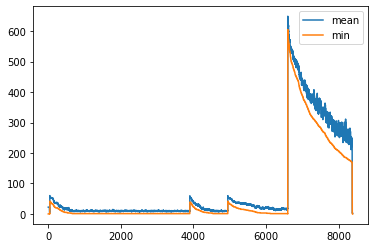

In [44]:
main_func(10, 20, 45, 35, 160, 50, 30, 40)

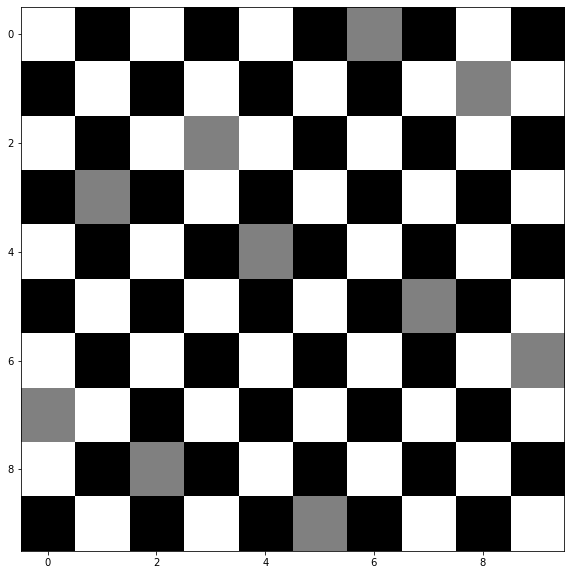

In [45]:
plot([7, 3, 8, 2, 4, 9, 0, 5, 1, 6])

### N=20

In [ ]:
main_func(20, 20, 45, 35, 160, 50, 30, 40)

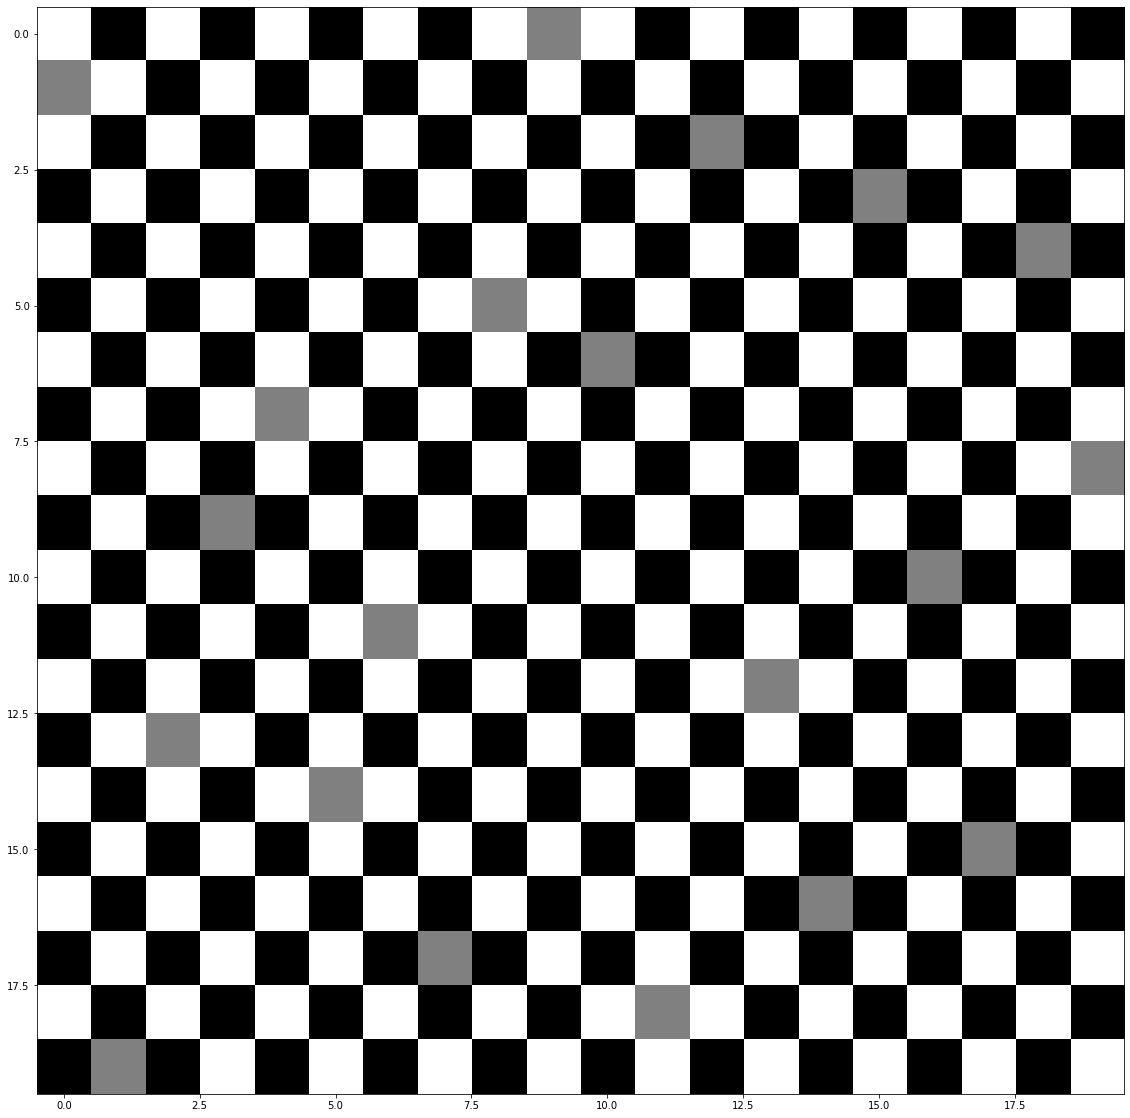

In [48]:
plot([1, 19, 13, 9, 7, 14, 11, 17, 5, 0, 6, 18, 2, 12, 16, 3, 10, 15, 4, 8])